## Create Dataset

In [5]:
import os
import numpy as np
from PIL import Image

In [9]:
dataset = []
labels = []

In [10]:
for filename in os.listdir("dataset"):
    if filename.endswith(".png"):
        img_path = os.path.join("dataset", filename)
        im = Image.open(img_path).convert('L')
        dataset.append(np.asarray(im, dtype=np.float32))
        labels.append(filename.replace(".png", ""))

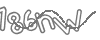

In [11]:
Image.fromarray(np.array(dataset[1], dtype=np.uint8))

In [12]:
labels[1]

'186hw'

In [13]:
ch2index = {}
index2ch = {}
index = 0
for label in labels:
    for ch in label:
        if ch not in ch2index.keys():
            ch2index[ch] = index
            index2ch[index] = ch
            index += 1

In [14]:
ch2index

{'0': 0,
 'p': 1,
 'd': 2,
 '3': 3,
 'w': 4,
 '1': 5,
 '8': 6,
 '6': 7,
 'h': 8,
 '2': 9,
 'v': 10,
 'e': 11,
 'x': 12,
 'f': 13,
 'b': 14,
 'n': 15,
 'z': 16,
 'q': 17,
 'u': 18,
 'y': 19,
 'a': 20,
 's': 21,
 '4': 22,
 'c': 23,
 'k': 24,
 '5': 25,
 '7': 26,
 'm': 27,
 'r': 28,
 'g': 29,
 'o': 30,
 'l': 31,
 'j': 32,
 't': 33,
 '9': 34,
 'i': 35}

In [15]:
print("total char type:", len(ch2index))

total char type: 36


In [16]:
y0 = []
y1 = []
y2 = []
y3 = []
y4 = []

for label in labels:
    y0.append(ch2index[label[0]])
    y1.append(ch2index[label[1]])
    y2.append(ch2index[label[2]])
    y3.append(ch2index[label[3]])
    y4.append(ch2index[label[4]])

In [17]:
len(y0)

11303

In [18]:
X_train = np.array(dataset[:10000]).reshape(-1, 40, 100, 1)
y_train = [
    np.array(y0[:10000]),
    np.array(y1[:10000]),
    np.array(y2[:10000]),
    np.array(y3[:10000]),
    np.array(y4[:10000]),
]

In [19]:
X_train.shape

(10000, 40, 100, 1)

In [20]:
X_test = np.array(dataset[10000:]).reshape(-1, 40, 100, 1)
y_test = [
    np.array(y0[10000:]),
    np.array(y1[10000:]),
    np.array(y2[10000:]),
    np.array(y3[10000:]),
    np.array(y4[10000:]),
]

In [21]:
X_test.shape

(1303, 40, 100, 1)

## Train the Network

In [22]:
from keras.layers import Activation, Input, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from keras.models import Model
from keras.layers.merge import Concatenate


def build_model():
    input_ = Input(shape=(40, 100, 1))

    # conv layer 1
    model = BatchNormalization()(input_)
    model = Conv2D(64, (5, 5), activation ='relu', padding='same')(model)
    model = MaxPool2D(pool_size=(2, 2))(model)

    # conv layer 2
    model = BatchNormalization()(model)
    model = Conv2D(128, (5, 5), activation ='relu', padding='valid')(model)
    model = MaxPool2D(pool_size=(2, 2))(model)

    # conv layer 3
    model = BatchNormalization()(model)
    model = Conv2D(256, (5, 5), activation ='relu', padding='valid')(model)
    model = MaxPool2D(pool_size=(2, 2))(model)
    model = Dropout(0.5)(model)

    # fully connected layer
    model = Flatten()(model)
    model = Dense(1024, activation='relu')(model)
    model = Dropout(0.5)(model)
    model = Dense(512, activation='relu')(model)

    x0 = Dense(36, activation='softmax')(model)
    x1 = Dense(36, activation='softmax')(model)
    x2 = Dense(36, activation='softmax')(model)
    x3 = Dense(36, activation='softmax')(model)
    x4 = Dense(36, activation='softmax')(model)

    x = [x0, x1, x2, x3, x4]

    model = Model(inputs=input_, outputs=x)
    return model

Using TensorFlow backend.


In [23]:
model = build_model()

W0713 22:40:58.133103 22016 deprecation_wrapper.py:119] From C:\Users\Gencho\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [24]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 40, 100, 1)   0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 40, 100, 1)   4           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 40, 100, 64)  1664        batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 20, 50, 64)   0           conv2d_1[0][0]                   
____________________________________________________________________________________________

In [25]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="rmsprop",
              metrics=['accuracy'])

In [26]:
model.fit(X_train, y_train, batch_size=64, epochs=20)

W0713 22:41:05.709970 22016 deprecation_wrapper.py:119] From C:\Users\Gencho\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/20
10000/10000 [==============================] - 6s 637us/step - loss: 17.3098 - dense_3_loss: 3.4032 - dense_4_loss: 3.4711 - dense_5_loss: 3.4614 - dense_6_loss: 3.4939 - dense_7_loss: 3.4757 - dense_3_accuracy: 0.0608 - dense_4_accuracy: 0.0535 - dense_5_accuracy: 0.0548 - dense_6_accuracy: 0.0490 - dense_7_accuracy: 0.0507
Epoch 2/20
10000/10000 [==============================] - 4s 367us/step - loss: 15.8180 - dense_3_loss: 2.9922 - dense_4_loss: 3.1825 - dense_5_loss: 3.1926 - dense_6_loss: 3.2119 - dense_7_loss: 3.2362 - dense_3_accuracy: 0.1242 - dense_4_accuracy: 0.0983 - dense_5_accuracy: 0.0980 - dense_6_accuracy: 0.0896 - dense_7_accuracy: 0.0881
Epoch 3/20
10000/10000 [==============================] - 4s 367us/step - loss: 14.3065 - dense_3_loss: 2.5075 - dense_4_loss: 2.8205 - dense_5_loss: 2.9574 - dense_6_loss: 3.0096 - dense_7_loss: 3.0214 - dense_3_accuracy: 0.2524 - dense_4_accuracy: 0.1852 - dense_5_accuracy: 0.1545 - dense_6_accuracy: 0.1444 - dense_7_acc

In [27]:
model.fit(X_train, y_train, batch_size=64, epochs=20) # train another 20 epochs

Epoch 1/20
10000/10000 [==============================] - 4s 378us/step - loss: 2.9369 - dense_3_loss: 0.3982 - dense_4_loss: 0.4767 - dense_5_loss: 0.5816 - dense_6_loss: 0.6598 - dense_7_loss: 0.8182 - dense_3_accuracy: 0.8776 - dense_4_accuracy: 0.8505 - dense_5_accuracy: 0.8189 - dense_6_accuracy: 0.7940 - dense_7_accuracy: 0.7517
Epoch 2/20
10000/10000 [==============================] - 4s 378us/step - loss: 2.7665 - dense_3_loss: 0.3942 - dense_4_loss: 0.4309 - dense_5_loss: 0.5535 - dense_6_loss: 0.6150 - dense_7_loss: 0.7724 - dense_3_accuracy: 0.8758 - dense_4_accuracy: 0.8640 - dense_5_accuracy: 0.8271 - dense_6_accuracy: 0.8063 - dense_7_accuracy: 0.7632
Epoch 3/20
10000/10000 [==============================] - 4s 375us/step - loss: 2.6975 - dense_3_loss: 0.3747 - dense_4_loss: 0.4352 - dense_5_loss: 0.5299 - dense_6_loss: 0.6164 - dense_7_loss: 0.7402 - dense_3_accuracy: 0.8839 - dense_4_accuracy: 0.8655 - dense_5_accuracy: 0.8399 - dense_6_accuracy: 0.8076 - dense_7_accura

In [28]:
model.fit(X_train, y_train, batch_size=64, epochs=20)  # train another 20 epochs

Epoch 1/20
10000/10000 [==============================] - 4s 420us/step - loss: 1.3986 - dense_3_loss: 0.2118 - dense_4_loss: 0.2178 - dense_5_loss: 0.2633 - dense_6_loss: 0.3208 - dense_7_loss: 0.3868 - dense_3_accuracy: 0.9365 - dense_4_accuracy: 0.9301 - dense_5_accuracy: 0.9167 - dense_6_accuracy: 0.9026 - dense_7_accuracy: 0.8804
Epoch 2/20
10000/10000 [==============================] - 4s 385us/step - loss: 1.3377 - dense_3_loss: 0.2059 - dense_4_loss: 0.2048 - dense_5_loss: 0.2581 - dense_6_loss: 0.2863 - dense_7_loss: 0.3806 - dense_3_accuracy: 0.9373 - dense_4_accuracy: 0.9373 - dense_5_accuracy: 0.9203 - dense_6_accuracy: 0.9113 - dense_7_accuracy: 0.8830
Epoch 3/20
10000/10000 [==============================] - 4s 376us/step - loss: 1.3002 - dense_3_loss: 0.1909 - dense_4_loss: 0.2063 - dense_5_loss: 0.2474 - dense_6_loss: 0.2935 - dense_7_loss: 0.3598 - dense_3_accuracy: 0.9419 - dense_4_accuracy: 0.9355 - dense_5_accuracy: 0.9239 - dense_6_accuracy: 0.9079 - dense_7_accura

In [29]:
res = model.evaluate(X_test, y_test)

1303/1303 [==============================] - 1s 425us/step


In [30]:
res[6:]

[0.17805065214633942,
 0.9201841950416565,
 0.8887183666229248,
 0.8979278802871704,
 0.8587874174118042]

In [31]:
model.save("weibo.com.h5")

## Use in product

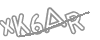

In [32]:
Image.fromarray(np.array(X_test[0].reshape(40, 100), dtype=np.uint8))

In [33]:
res = model.predict(np.array([X_test[0]]).reshape(1, 40, 100, 1))

In [34]:
print(index2ch[res[0].argmax(1)[0]], 
      index2ch[res[1].argmax(1)[0]], 
      index2ch[res[2].argmax(1)[0]], 
      index2ch[res[3].argmax(1)[0]], 
      index2ch[res[4].argmax(1)[0]])

x k 6 a r


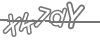

In [35]:
Image.fromarray(np.array(X_test[1].reshape(40, 100), dtype=np.uint8))

In [36]:
res = model.predict(np.array([X_test[1]]).reshape(1, 40, 100, 1))

In [37]:
print(index2ch[res[0].argmax(1)[0]], 
      index2ch[res[1].argmax(1)[0]], 
      index2ch[res[2].argmax(1)[0]], 
      index2ch[res[3].argmax(1)[0]], 
      index2ch[res[4].argmax(1)[0]])

x k 7 d y
